###**IRIS FLOWER CLASSIFICATION**

The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements  of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

<img src="https://datacrayon.com/assets/images/86568bfe5b21959a5ff4ec05aa20a0c0.jpg" >

##***Importing Libraries***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##***Data Loading And Exploration***

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##***Data Preprocessing***

###Checking for null values

In [ ]:
iris.isna().values.any()

False

###Checking for outlier
Using Box Plot

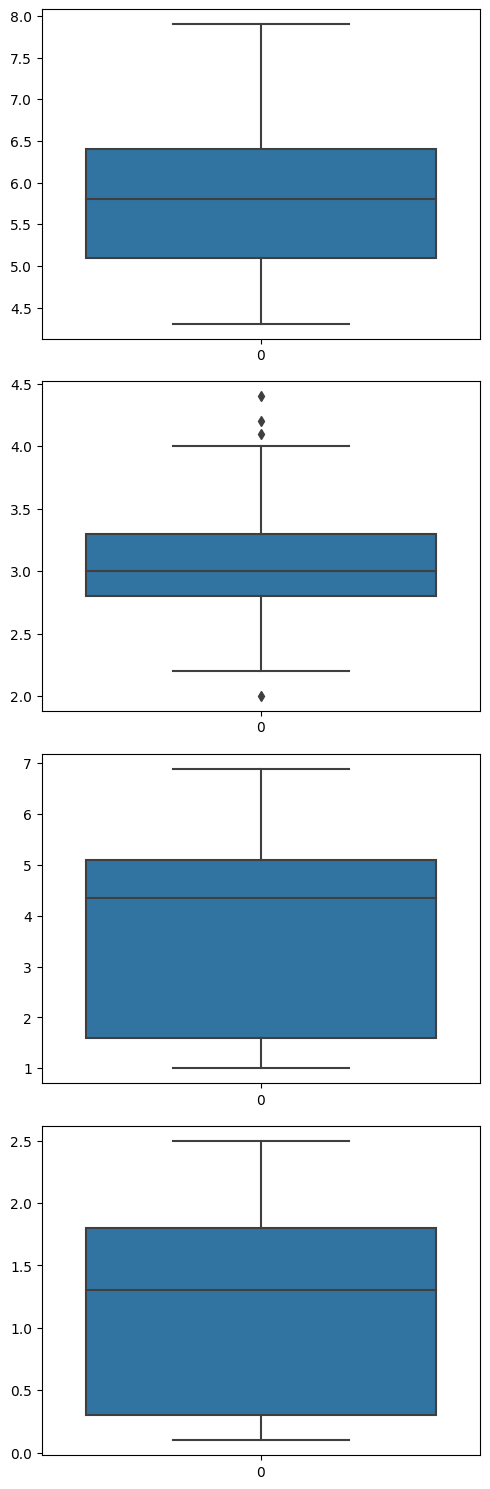

In [ ]:
fig, axs = plt.subplots(4, figsize = (5,15))
plt1 = sns.boxplot(iris['sepal_length'], ax = axs[0])
plt2 = sns.boxplot(iris['sepal_width'], ax = axs[1])
plt3 = sns.boxplot(iris['petal_length'], ax = axs[2])
plt4 = sns.boxplot(iris['petal_width'], ax = axs[3])
plt.tight_layout()

###Handling Outliers
Using IQR Method

In [ ]:
# Using IQR Method
sepal = pd.Series(iris['sepal_width'])
quarter1 = sepal.quantile(0.25)
quarter3 = sepal.quantile(0.75)
IQR = quarter3-quarter1
upper_limit = quarter3 + 1.5*IQR
lower_limit = quarter1 - 1.5*IQR

outlier_index = iris[(iris['sepal_width'] < lower_limit) | (iris['sepal_width'] > upper_limit)].index
cleaned_iris = iris.drop(outlier_index)
cleaned_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


###Rechecking for Outlier

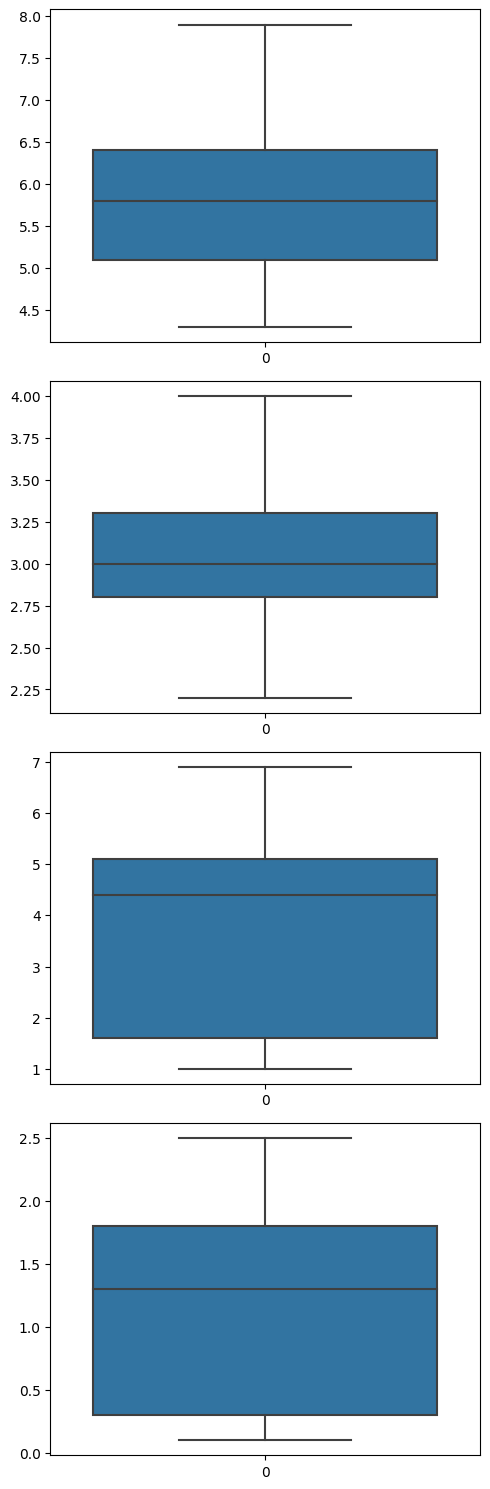

In [ ]:
fig, axs = plt.subplots(4, figsize = (5,15))
plt1 = sns.boxplot(cleaned_iris['sepal_length'], ax = axs[0])
plt2 = sns.boxplot(cleaned_iris['sepal_width'], ax = axs[1])
plt3 = sns.boxplot(cleaned_iris['petal_length'], ax = axs[2])
plt4 = sns.boxplot(cleaned_iris['petal_width'], ax = axs[3])
plt.tight_layout()

### Data preparation form modeling training

In [ ]:
x_data = cleaned_iris.drop('species', axis = 1)
y_data = cleaned_iris['species']
print(x_data, y_data)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[146 rows x 4 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 146, dtype: obj

###Spliting Data into train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=5)

## ***Model Training using Logistic Regression***

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##***Testing Model***

In [ ]:
y_prediction = model.predict(x_test)
print(y_prediction)
print("\nAccuracy Score: ", accuracy_score(y_test,y_prediction))

['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa']

Accuracy Score:  0.9772727272727273
